In [1]:
import kagglehub
import matplotlib.pyplot as plt
import matplotlib as mpl

# Download latest version
#path = kagglehub.dataset_download("hojjatk/mnist-dataset")
#print("Path to dataset files:", path)

#Or: 

from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,as_frame=False) #we'll use an numpy array for acess num vectors
mnist.keys()


c:\Users\augusto\.vscode\Data Sci and Ml\Linear_Regression\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
#caracteristcs
X=mnist["data"]
y=mnist["target"]
y.shape # size


(70000,)

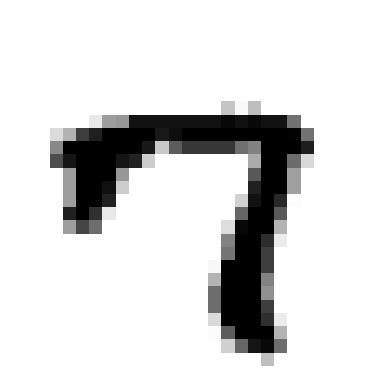

In [5]:
import random
import numpy as np


digit1 =X[6666] #num object,using as vector
digittt=digit1.reshape(28,28)

plt.imshow(digittt,cmap='binary')
plt.axis('off')
plt.show()
#y[6666]=7

y=y.astype(np.uint8) #nums str will be atributes as int

In [6]:
#Training and data
from sklearn.linear_model import SGDClassifier



x_train,x_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[:60000]

y_train7=(y_train==7)
y_test7=(y_test==7)

sgd_class=SGDClassifier(random_state=4442)
sgd_class.fit(x_train,y_train7) #train using the vector-target that we want
sgd_class.predict([X[4]])

array([False])

In [7]:
#Evaluating
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.base import BaseEstimator

evalll=cross_val_score(sgd_class,x_train,y_train7,scoring="accuracy",cv=3) # %accuracy in preview

#crating a vector full true for each data that is not 7
class Seven_never(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool) # --> create full-True vector for each label-row diferent of y 


sv=Seven_never()
#cross validation is the part that verify relation between seven_class and data
eval_verify=cross_val_score(sv,x_train,y_train7,scoring="accuracy",cv=3) #

print(evalll,eval_verify)

[0.9772  0.9738  0.97765] [0.89535 0.8984  0.893  ]


In [8]:
#Confusion Matrix:
#what is the proportion of predict the Y as result of imput/param X?
from sklearn.metrics import confusion_matrix

confuison_vector=cross_val_predict(sgd_class,x_train,y_test7,cv=3) #compare 5 vectors with specifc other vectors
print(confuison_vector)

con_table= confusion_matrix(y_train7,confuison_vector) #confusion [not 7(NEG CLASS): true neg | false pos  ,7(POSITIVE CLASS): false neg | true pos ]
#1: (is 7 is the contrary of non 7) [non 7,is 7] | 2: (non  7 is contray of is 7) [non 7,is 7]

con_perfect=confusion_matrix(y_train7,y_train7)
print(con_table,con_perfect)

[False False False ... False False False]
[[53218   517]
 [  910  5355]] [[53735     0]
 [    0  6265]]


In [9]:
#evaluating

from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import f1_score

precision=precision_score(y_train7,confuison_vector)
recall=recall_score(y_train7,confuison_vector)

#f1 score:
f1=f1_score(y_train7,confuison_vector)
print(f"f1({precision,recall}): {f1}")


f1((0.9119550408719346, 0.8547486033519553)): 0.8824256406031145


In [10]:
model_limit=sgd_class.decision_function([digit1])
print(model_limit)
threshold=6000

preview_with_limit=(model_limit > threshold)

#using scores

y7_scores=cross_val_predict(sgd_class,x_train,y_train7,cv=3,method="decision_function")# preview nums scores and compares recall-precision with train set
from sklearn.metrics import precision_recall_curve

prec,rec,limits=precision_recall_curve(y_train7,y7_scores) 


[3842.76323689]


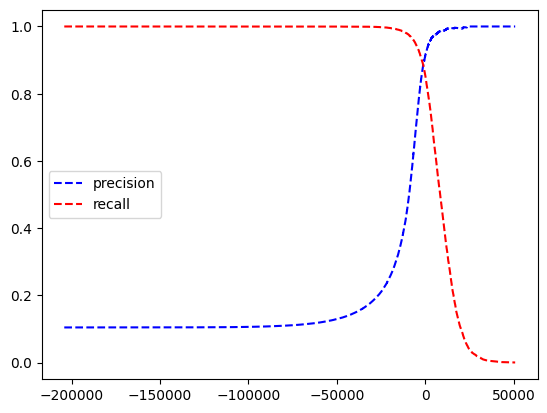

In [11]:
plt.plot(limits,prec[:-1],"b--",label="precision")
plt.plot(limits,rec[:-1],"r--",label="recall")
plt.legend()
plt.show()

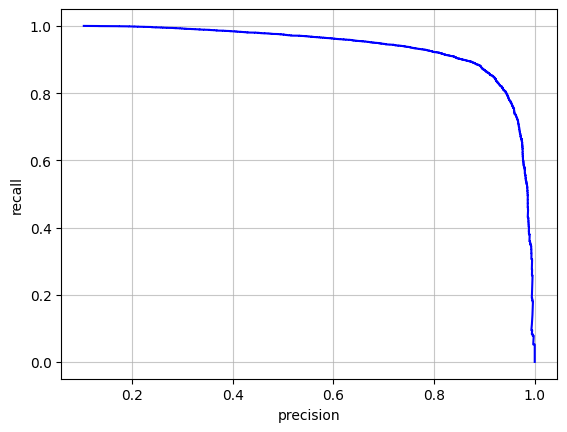

In [12]:
#compare perfomance:
plt.plot(prec[:-1],rec[:-1],"b-")
plt.xlabel("precision")
plt.ylabel("recall")
plt.grid(alpha=0.7)
plt.show()

In [13]:
#searching for accuracy 
limits_85=limits[np.argmax(precision>.85)] #get arg equal select range of precision in limits score
y_85=(y7_scores > limits)

print(f"scores : \n precision: {precision_score(y_train7,y_85)},\n recall: {recall_score(y_train7,y_85)},\n f1 : {f1_score(y_train7,y_85)}")

scores : 
 precision: 0.20265955580505948,
 recall: 0.9219473264166002,
 f1 : 0.3322786630616119


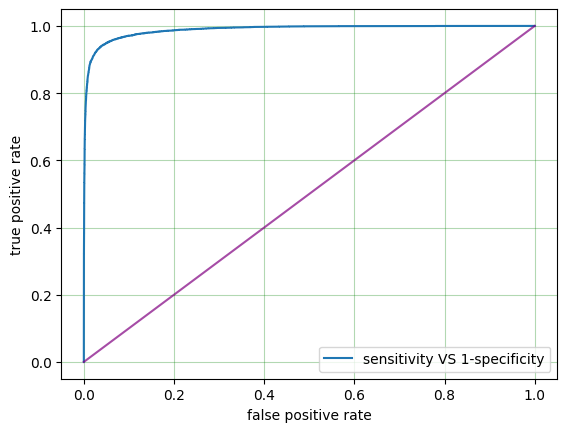

0.988546239188783


In [14]:
#roc curve

from sklearn.metrics import roc_curve

tpr,fpr,limit=roc_curve(y_train7,y7_scores) #tpr (true pos) x fpr (false pos) | positive: 7 , negative : non 7
#also : tnr ratio of negative instances as positive --> fpr = (1-tnr)

plt.plot(tpr,fpr,label="sensitivity VS 1-specificity")
plt.plot([0,1],[0,1],color="purple",alpha=0.7)
plt.grid(color="g",alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()

from sklearn.metrics import roc_auc_score
area=roc_auc_score(y_train7,y7_scores)
print(area) # perfect : 100

In [15]:
#Using and comparing random forest
from sklearn.ensemble import RandomForestClassifier #ensemble tells an way of combinations model

forest=RandomForestClassifier(random_state=4442)
y_for_scores=cross_val_predict(forest,x_train,y_train7,cv=3,method="predict_proba") #1 collunm: prb of positive class
print(y_for_scores)

[[0.99 0.01]
 [1.   0.  ]
 [0.86 0.14]
 ...
 [1.   0.  ]
 [0.99 0.01]
 [0.99 0.01]]


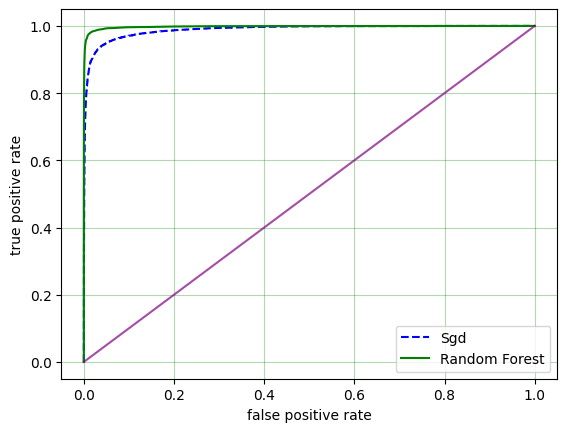

0.9979040562257913


In [ ]:
#Compare


forest_roc_y7=y_for_scores[:,1]
f_tpr,f_fpr,f_limit=roc_curve(y_train7,forest_roc_y7)


plt.plot(tpr,fpr,"b--",label="Sgd")
plt.plot(f_tpr,f_fpr,"g-",label="Random Forest")
plt.plot([0,1],[0,1],color="purple",alpha=0.7)
plt.grid(color="g",alpha=0.3)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend()
plt.show()

print(f'auc score{roc_auc_score(y_train7,forest_roc_y7)}')
